# Plot models from P1D archive in LaCE 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

In [2]:
from lace.archive import gadget_archive
from lace.archive import nyx_archive

### Access to P1D archive stored in the LaCE repository

In [3]:
#training_set='Pedersen21'
training_set='Cabayol23'
# training_set='Nyx'
emu_params=['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']
if training_set=='Nyx':
    archive=nyx_archive.NyxArchive()
else:    
    archive=gadget_archive.GadgetArchive(postproc=training_set)

### Inspect simulation suite

In [4]:
# each simulation has multiple snapshots, and each snapshot might have multiple post-processings
# (this also includes multiple axes and phases from a given simulation)
print('{} entries in the archive'.format(len(archive.data)))

12210 entries in the archive


In [5]:
# now we decide how to combine phases and axes to provide the training set to be used in the emulator
training_data=archive.get_training_data(emu_params=emu_params)
print('{} entries in the training set'.format(len(training_data)))

9900 entries in the training set


### Linear density power spectra in the archive

This suite of simulations did not vary cosmology, so all values of the effective slope ($n_p$) are the same. 

However, different redshifts have different values of the linear amplidue ($\Delta_p^2$).

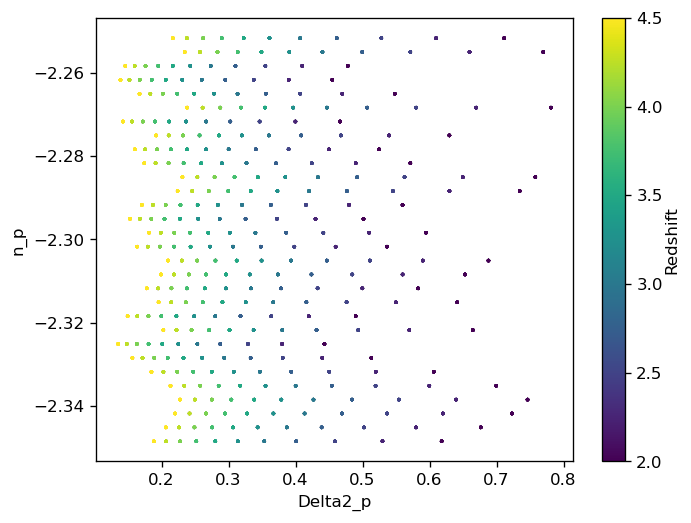

In [6]:
archive.plot_samples('Delta2_p','n_p')

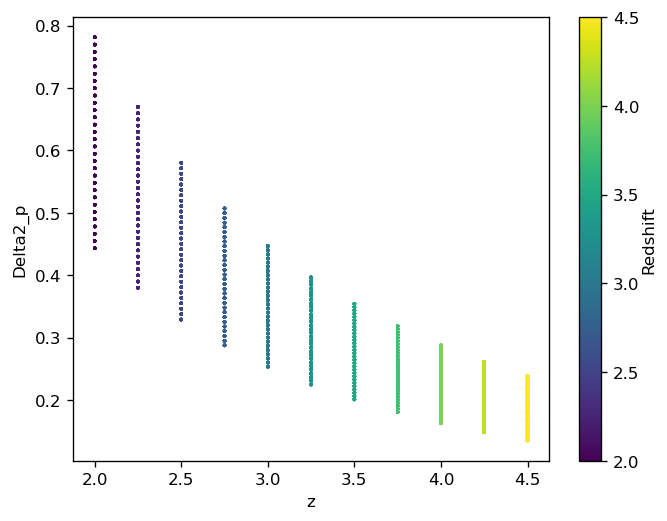

In [7]:
archive.plot_samples('z','Delta2_p')

### IGM parameters in the archive

The thermal/ionization history are different in different simulations, so we have more points for those parameters

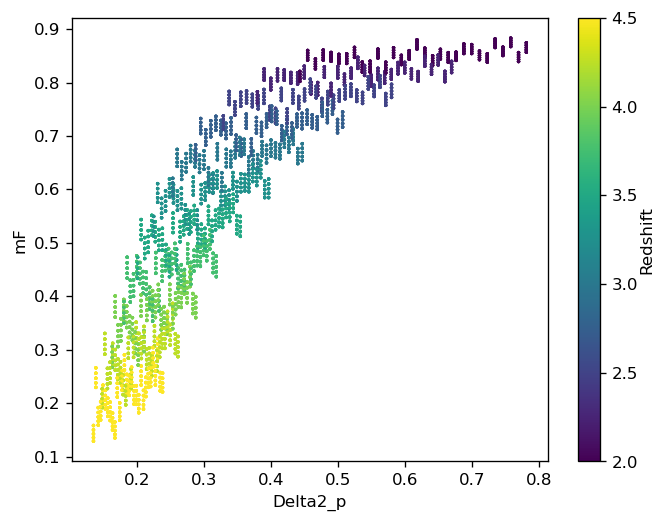

In [8]:
# mean transmitted flux fraction vs linear power amplitude
archive.plot_samples('Delta2_p','mF')

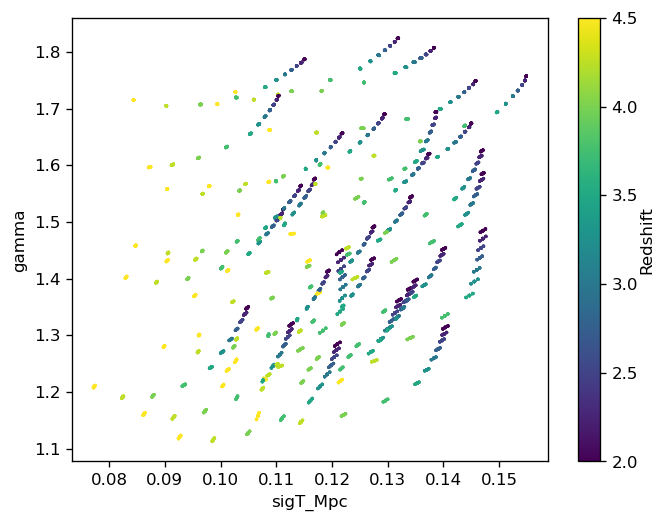

In [9]:
# thermal broadening (in Mpc) vs slope of temperature-density relation
archive.plot_samples('sigT_Mpc','gamma')

In [10]:
plot_ylog=True
def plot_p1d_dependence(data,tag):
    N=len(data)
    print('N =',N)
    val=np.array([data[i][tag] for i in range(N)])
    imin=np.argmin(val)
    imax=np.argmax(val)
    min_val=val[imin]
    max_val=val[imax]
    for i in range(N):
        col = plt.cm.jet((val[i]-min_val)/(max_val-min_val))
        if i in [imin,imax]:
            label=tag+' = %f'%val[i]
        else:
            label=None
        # plot only relevant k-range
        k_Mpc=data[i]['k_Mpc']
        p1d_Mpc=data[i]['p1d_Mpc']
        mask=(k_Mpc>0) & (k_Mpc<10)
        if plot_ylog:
            plt.loglog(k_Mpc[mask],k_Mpc[mask]*p1d_Mpc[mask],color=col,label=label,alpha=0.2)            
        else:
            plt.semilogx(k_Mpc[mask],k_Mpc[mask]*p1d_Mpc[mask],color=col,label=label,alpha=0.2)
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_{\delta}(k_\parallel)$')
    plt.legend()
    plt.title(r'$P_{\rm 1D}(k)$ as a function of '+tag)

N = 9900


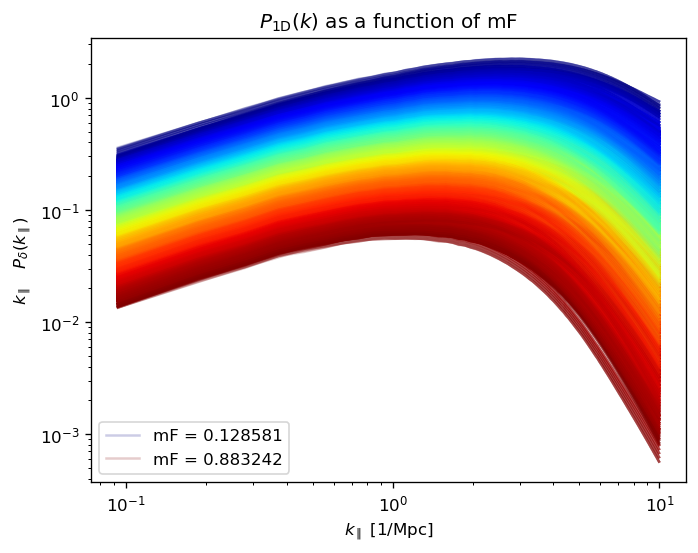

In [11]:
plot_p1d_dependence(training_data,'mF')